In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [18]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows', None)


In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
train.shape, test.shape

((1168, 81), (292, 81))

In [ ]:
train_all_cols = train
test_all_cols = test

# just keeping all columns and filling with mode for cat_cols 

<Axes: >

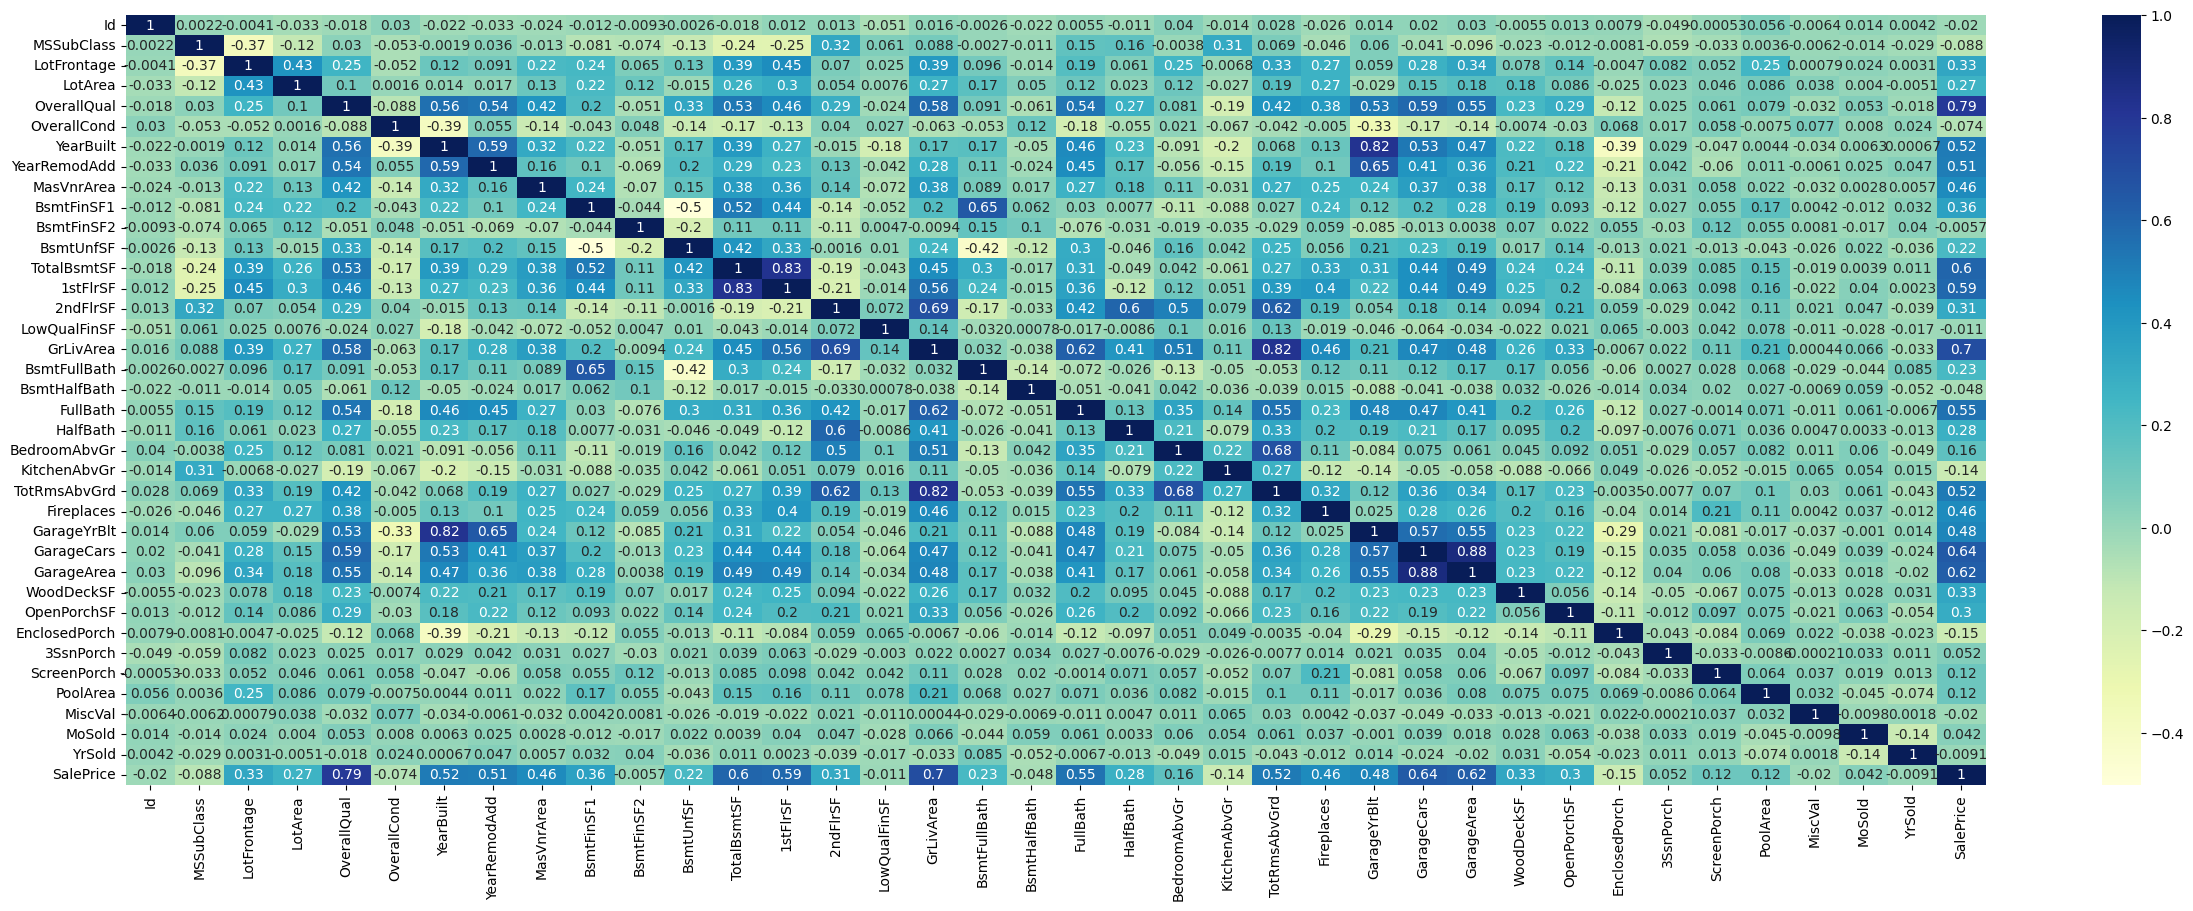

In [23]:

X_numeric = train.select_dtypes(include=[np.number])
plt.figure(figsize=(30,10))
sns.heatmap(X_numeric.corr(), annot=True, cmap="YlGnBu")

In [40]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']


In [41]:
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 

In [70]:
X_dummy = X.copy()
X_dummy = pd.get_dummies(X_dummy, columns=cat_cols, drop_first=True)
X_dummy.info()
X_numeric = X_dummy.select_dtypes(include=[np.number])
plt.figure(figsize=(30,10))
sns.heatmap(X_numeric.corr(), annot=True, cmap="YlGnBu")

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 242 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(206), float64(3), int64(33)
memory usage: 572.6 KB


# რადგან null-ები 80% პროცენტზე მეტია მათი მოდათი ან რაიმე სხვა მეთოდით შევსება უზუსტობებს გაგვიჩენდა და ჯობია დავდროპოთ

In [7]:
X[cat_cols].isna().mean()[X[cat_cols].isna().mean()*100 > 80] *100

NameError: name 'X' is not defined

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
dtype: float64


<Axes: >

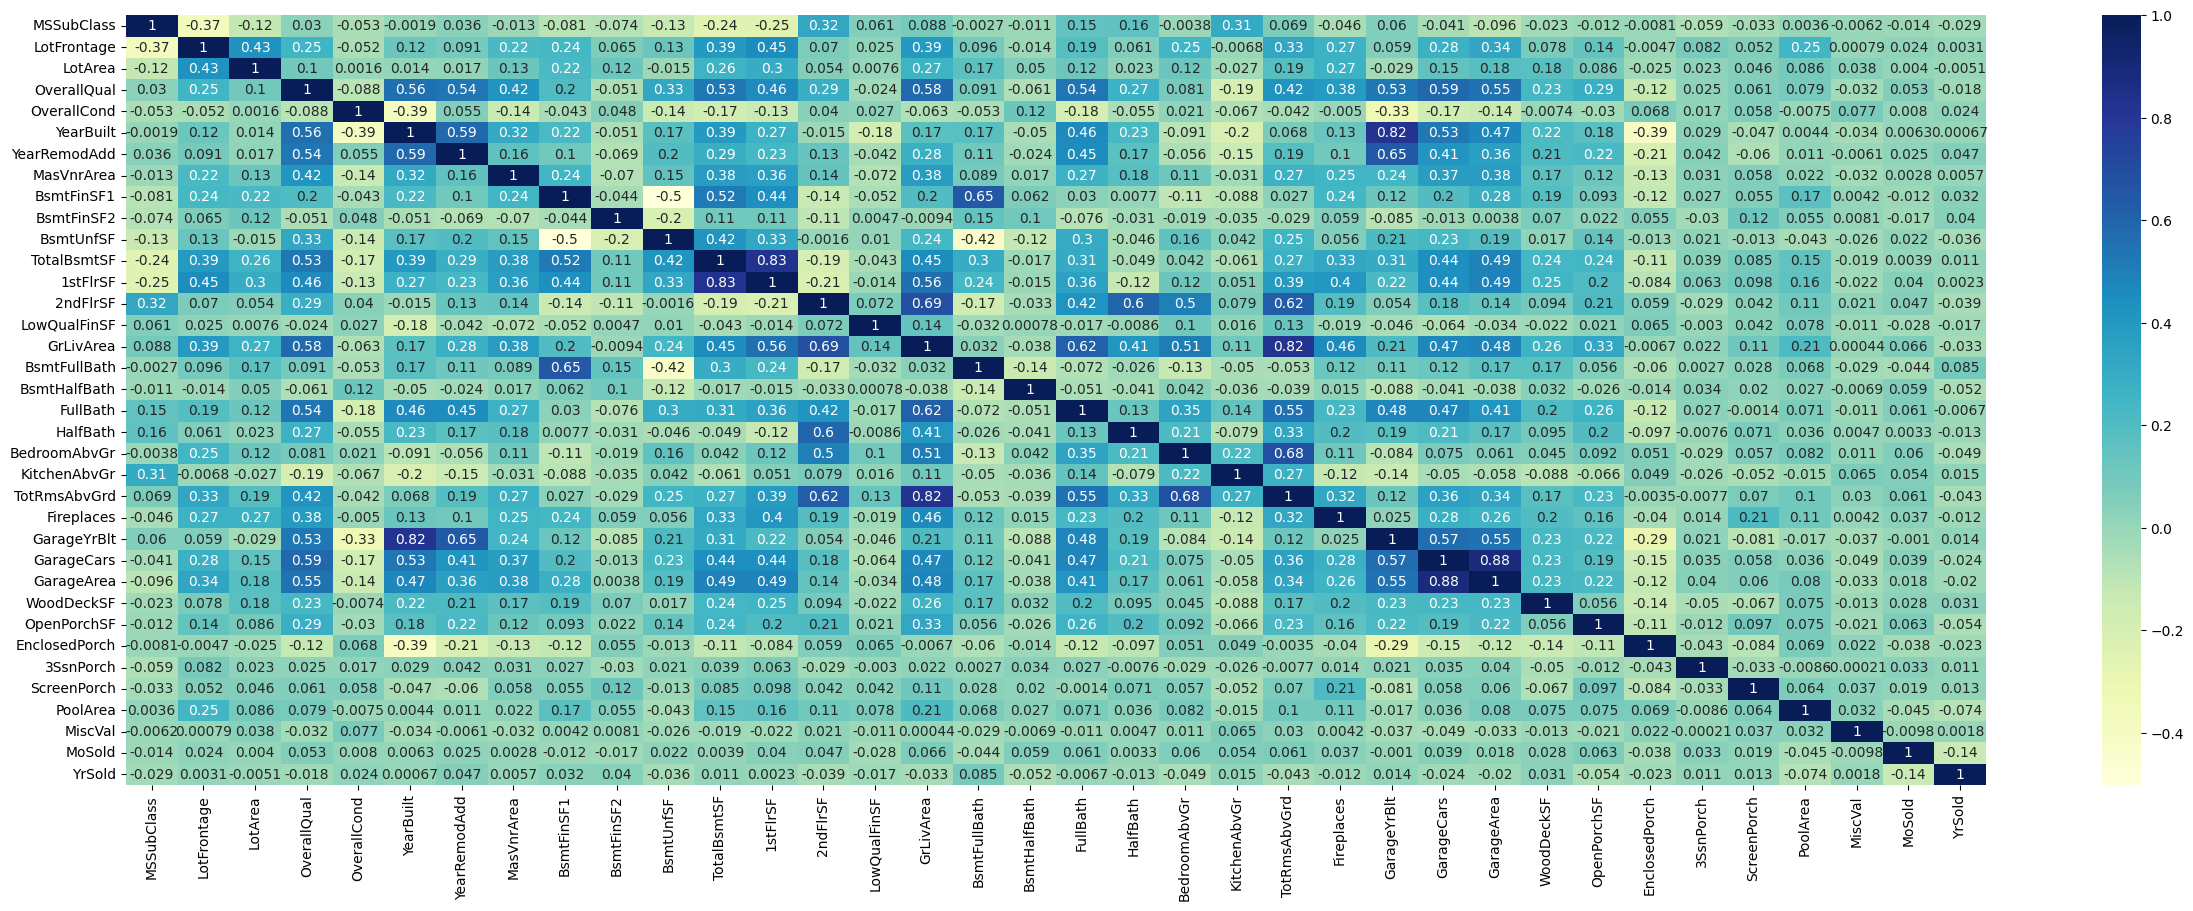

In [66]:
missing_ratio = df.isna().mean().sort_values(ascending=False)
print(missing_ratio[missing_ratio > 0.8])

# Ensure all columns are numeric before computing correlation
X_numeric = X.select_dtypes(include=[np.number])
plt.figure(figsize=(30,10))
sns.heatmap(X_numeric.corr(), annot=True, cmap="YlGnBu")


In [27]:
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
X


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
254           20       RL         70.0     8400   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5            6       1957          1957     Gable  CompShg     MetalSd     MetalSd    BrkFace         0.0        TA        Gd     CBlock       TA       TA           No          Rec         922          Unf           0        392         1314    GasA        TA          Y      SBrkr      1314         0             0       1314             1             0         1         0             3             1          TA             5        Typ           0          Gd     Attchd       1957.0          RFn           1         294         TA         TA          Y         250            0              0          0            0         0     Ex  MnPrv        Shed        0       6    2010       WD        Normal
1066          60       RL         59.0     7837   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            7       1993          1994     Gable  CompShg     VinylSd     VinylSd    BrkFace         0.0        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        799          799    GasA        Gd          Y      SBrkr       799       772             0       1571             0             0         2         1             3             1          TA             7        Typ           1          TA     Attchd       1993.0          RFn           2         380         TA         TA          Y           0           40              0          0            0         0     Ex  MnPrv        Shed        0       5    2009       WD        Normal
638           30       RL         67.0     8777   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl      Edwards      Feedr       Norm     1Fam     1Story            5            7       1910          1950     Gable  CompShg     MetalSd     Wd Sdng    BrkFace         0.0        TA        TA     CBlock       Fa       TA           No          Unf           0          Unf           0        796          796    GasA        Gd          Y      FuseA       796         0             0        796             0             0         1         0             2             1          TA             4        Typ           0          Gd     Attchd          NaN          Unf           0           0         TA         TA          P         328            0            164          0            0         0     Ex  MnPrv        Shed        0       5    2008       WD        Normal
799           50       RL         60.0     7200   Pave  Grvl      Reg         Lvl    AllPub    Corner       Gtl        SWISU      Feedr       Norm     1Fam     1.5Fin            5            7       1937          1950     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       252.0        TA        TA     BrkTil       Gd       TA           No          ALQ         569          Unf           0        162          731    GasA        Ex          Y      SBrkr       981 

In [28]:
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())
train[num_cols] =  train[num_cols].fillna(train[num_cols].mean())
train[num_cols].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [29]:
# Function to perform WOE encoding for all categorical columns
def woe_encode_all_categorical(df, cat_columns, target_col):
    df_woe = df.copy()
    
    woe_mappings = {}
    iv_values = {}
    
    for col in cat_columns:
        print(f"Processing {col}...")
        
        groups = df.groupby([col])[target_col].agg(['count', 'sum'])
        groups.columns = ['n_obs', 'n_pos']
        groups['n_neg'] = groups['n_obs'] - groups['n_pos']
        
        groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
        groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
        
        groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
        groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
        
        groups.replace([np.inf, -np.inf], 0, inplace=True)
        groups.fillna(0, inplace=True)
        
        woe_dict = groups['woe'].to_dict()
        iv = groups['iv'].sum()
        
        woe_mappings[col] = woe_dict
        iv_values[col] = iv
        
        df_woe[f'{col}_woe'] = df_woe[col].map(woe_dict)
    
    iv_df = pd.DataFrame({
        'Feature': list(iv_values.keys()),
        'Information_Value': list(iv_values.values())
    }).sort_values('Information_Value', ascending=False)
    
    print("\nInformation Value Summary:")
    print(iv_df)
    
    return df_woe, woe_mappings, iv_values

In [30]:
ids = train.pop('Id')


In [31]:
train.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
254           20       RL         70.0     8400   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5            6       1957          1957     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        Gd     CBlock       TA       TA           No          Rec         922          Unf           0        392         1314    GasA        TA          Y      SBrkr      1314         0             0       1314             1             0         1         0             3             1          TA             5        Typ           0         NaN     Attchd  1957.000000          RFn           1         294         TA         TA          Y         250            0              0          0            0         0    NaN    NaN         NaN        0       6    2010       WD        Normal     145000
1066          60       RL         59.0     7837   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            7       1993          1994     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        799          799    GasA        Gd          Y      SBrkr       799       772             0       1571             0             0         2         1             3             1          TA             7        Typ           1          TA     Attchd  1993.000000          RFn           2         380         TA         TA          Y           0           40              0          0            0         0    NaN    NaN         NaN        0       5    2009       WD        Normal     178000
638           30       RL         67.0     8777   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards      Feedr       Norm     1Fam     1Story            5            7       1910          1950     Gable  CompShg     MetalSd     Wd Sdng        NaN         0.0        TA        TA     CBlock       Fa       TA           No          Unf           0          Unf           0        796          796    GasA        Gd          Y      FuseA       796         0             0        796             0             0         1         0             2             1          TA             4        Typ           0         NaN        NaN  1978.662138          NaN           0           0        NaN        NaN          P         328            0            164          0            0         0    NaN  MnPrv         NaN        0       5    2008       WD        Normal      85000
799           50       RL         60.0     7200   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl        SWISU      Feedr       Norm     1Fam     1.5Fin            5            7       1937          1950     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       252.0        TA        TA     BrkTil       Gd       TA           No          ALQ         569          Unf           0        162          731    Gas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load Data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X = train_df.drop(["SalePrice", "Id"], axis=1)
y = train_df["SalePrice"]
X_test = test_df.drop(["Id"], axis=1)

# 2. Column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. Preprocessing Pipelines
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# 4. Combine with LinearRegression
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

# 5. GridSearchCV with KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# LinearRegression has no real hyperparameters to tune, but we include the empty param grid for consistency
param_grid = {}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=kfold,
    verbose=1
)

# 6. Fit
grid_search.fit(X, y)

# 7. Results
best_rmse = -grid_search.best_score_
print("Best CV RMSE:", best_rmse)
print("Best Estimator:", grid_search.best_estimator_)

# 8. Predict on test set
predictions = grid_search.best_estimator_.predict(X_test)

# 9. Save submission
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": predictions
})
submission.to_csv("submission_linear_cv.csv", index=False)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best CV RMSE: 35011.33839210919
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF

In [3]:
print(grid_search.be)


{}
